# AllLife Bank Customer Segmentation

## Description

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improvised. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the back-end support services poorly. Based on this, the operations team wants to upgrade the service delivery model to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendation to the bank on how to better market and service these customers. 

### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries(including visiting the bank, online and through a call center).

## Data Dictionary

- SI_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logics made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [4]:
#import neccesary libraries 

#reading and manipulating data
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns

#scale data using z-score
from sklearn.preprocessing import StandardScaler

#compute distances
from scipy.spatial.distance import cdist

#k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

#visualize silhouette score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#Hierachical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#to compute distances
from scipy.spatial.distance import pdist

#PCA 
from sklearn.decomposition import PCA

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings('ignore')

print('Imported Successfully')

Imported Successfully


In [5]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
type(data)

pandas.core.frame.DataFrame

In [6]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No null values

In [7]:
data.shape

(660, 7)

Data has 660 rows and 7 columns

In [8]:
data.duplicated().sum()

0

No duplicate rows

In [9]:
data.sample(n=10, random_state = 1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [10]:
att_data = data.copy().drop(['Sl_No', 'Customer Key'], axis = 1)

In [11]:
att_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Drop Sl_No and Customer Key column as these columns are just for indexing

## EDA

## Univariate Analysis

In [12]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

There are 5 rows that although are unique, share a customer. Meaning, there are customers with multiple credit cards. 

In [13]:
att_data.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
def uni_plots(data, feature, distplot_switch = False):
    """
    The purpose of this function is to plot a count, box, kde, and violin plot of the input data and feature.
    Arranges plots in one plot for easier viewing
    
    The plot also shows the 5 number summary and the mean of the data
    
    """
    
    
    fig, axis = plt.subplots(2,2);
    fig.suptitle('Univariate Plots for ' + feature);
    if distplot_switch == True:
        sns.distplot(ax = axis[0,0], x = data[feature]);
    else:
        sns.countplot(ax = axis[0,0], x = data[feature]);
    sns.boxplot(ax = axis[0,1], x = data[feature]);
    sns.kdeplot(ax = axis[1,0], x = data[feature]);
    sns.violinplot(ax = axis[1,1], x = data[feature]);
    
    mean_val = data[feature].mean()
    min_val, q1_val, median_val, q3_val, max_val = data[feature].quantile([0, 0.25, 0.5, 0.75, 1])
    
    print('5 Number Summary for',feature);
    print('Min:',min_val);
    print('Q1:',q1_val);
    print('Median:',median_val);
    print('q3_val:',q3_val);
    print('Max:', max_val);
    print('Mean:', mean_val);
    

5 Number Summary for Avg_Credit_Limit
Min: 3000.0
Q1: 10000.0
Median: 18000.0
q3_val: 48000.0
Max: 200000.0
Mean: 34574.242424242424


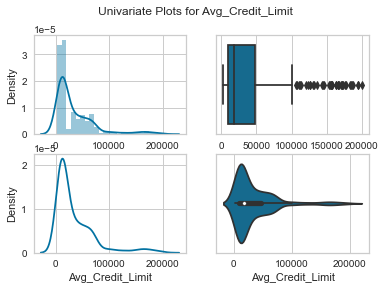

In [15]:
uni_plots(att_data, 'Avg_Credit_Limit', distplot_switch = True)

Avg_Credit_Limit is heavily right skewed with many outliers

5 Number Summary for Total_Credit_Cards
Min: 1.0
Q1: 3.0
Median: 5.0
q3_val: 6.0
Max: 10.0
Mean: 4.706060606060606


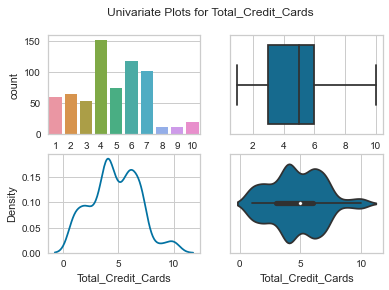

In [16]:
uni_plots(att_data, 'Total_Credit_Cards')

Total_Credit_Cards is relativly normal with no outliers

5 Number Summary for Total_visits_bank
Min: 0.0
Q1: 1.0
Median: 2.0
q3_val: 4.0
Max: 5.0
Mean: 2.403030303030303


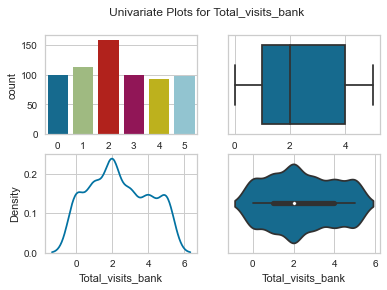

In [17]:
uni_plots(att_data, 'Total_visits_bank')

Total_visits_bank is normally distributed with no outliers

5 Number Summary for Total_visits_online
Min: 0.0
Q1: 1.0
Median: 2.0
q3_val: 4.0
Max: 15.0
Mean: 2.606060606060606


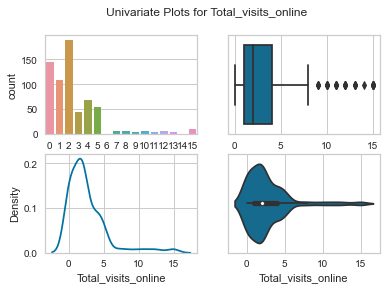

In [18]:
uni_plots(att_data, 'Total_visits_online')

Total_visits_online is right skewed with a few outliers

5 Number Summary for Total_calls_made
Min: 0.0
Q1: 1.0
Median: 3.0
q3_val: 5.0
Max: 10.0
Mean: 3.5833333333333335


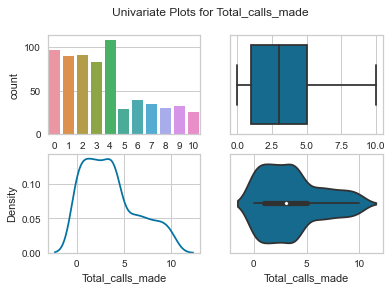

In [19]:
uni_plots(att_data, 'Total_calls_made')

Totals_calls_made is right skewed

## Bivariate Analysis

<AxesSubplot:>

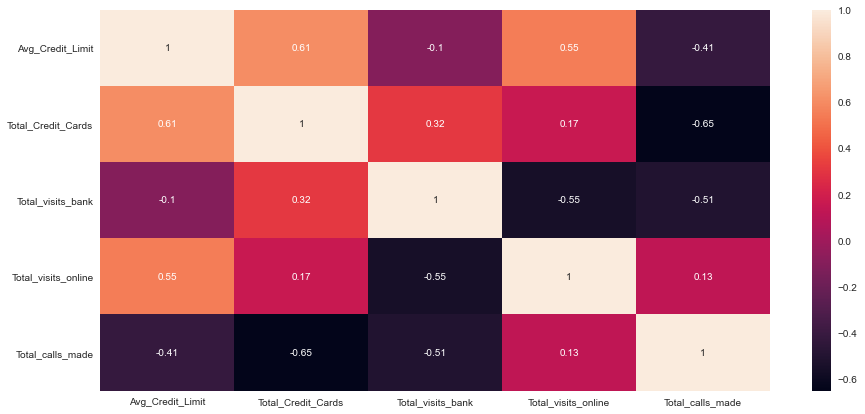

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(att_data.corr(), annot=True)

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

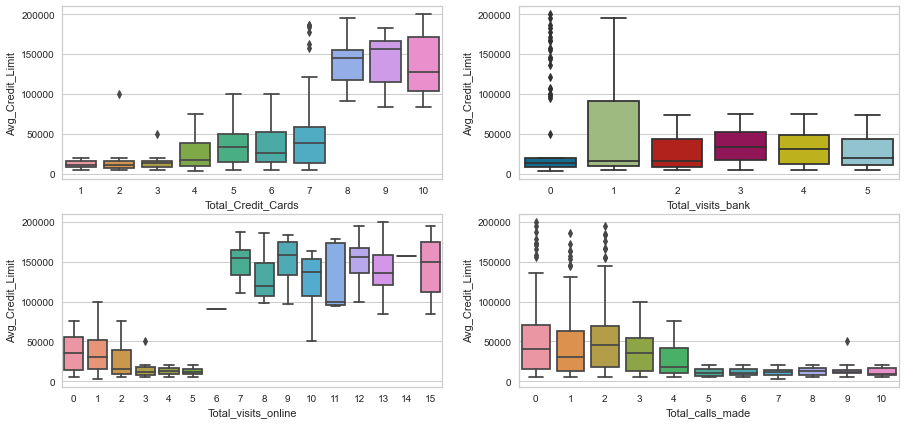

In [21]:
fig, axis = plt.subplots(2,2, figsize = (15,7))


sns.boxplot(data = att_data, x = 'Total_Credit_Cards', y = 'Avg_Credit_Limit', ax = axis[0,0])
sns.boxplot(data = att_data, x = 'Total_visits_bank', y = 'Avg_Credit_Limit', ax = axis[0,1])
sns.boxplot(data = att_data, x = 'Total_visits_online', y = 'Avg_Credit_Limit', ax = axis[1,0])
sns.boxplot(data = att_data, x = 'Total_calls_made', y = 'Avg_Credit_Limit', ax = axis[1,1])



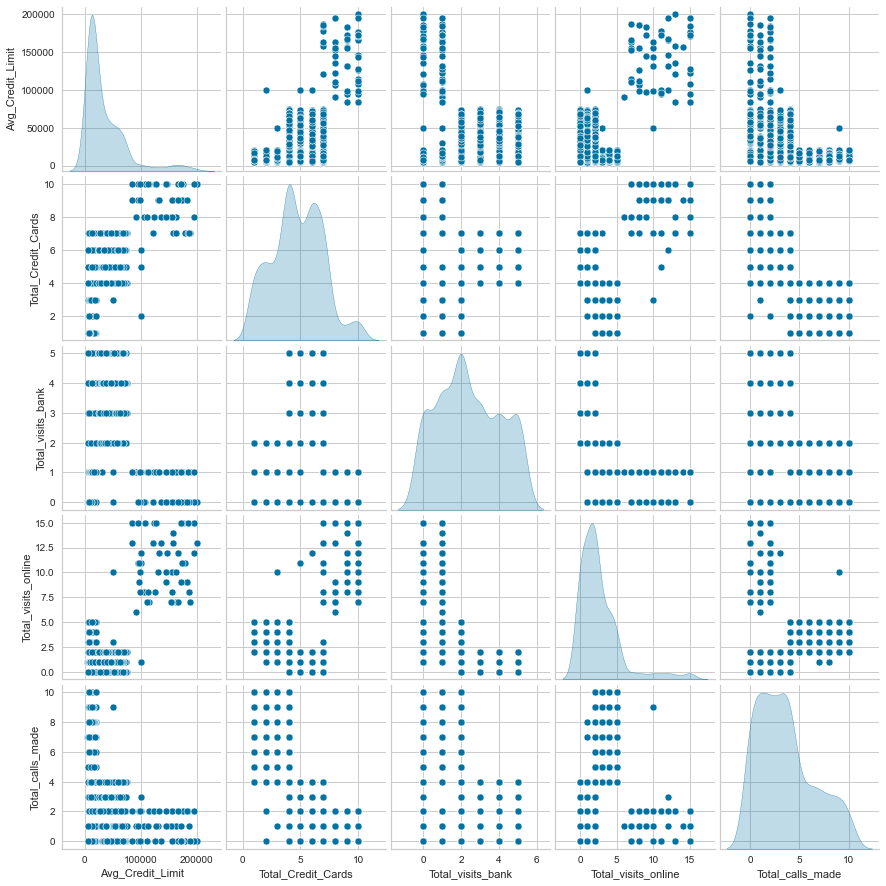

In [22]:
sns.pairplot(data = att_data, diag_kind = 'kde')

## Pre-Processing

In [29]:
scaled_data = att_data.copy()
scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(att_data), columns = att_data.columns)

In [30]:
scaled_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


The data has been converted to a standard form 

## K-Means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907383936093271
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9093703386475
Number of Clusters: 8 	Average Distortion: 0.8919961620963889


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

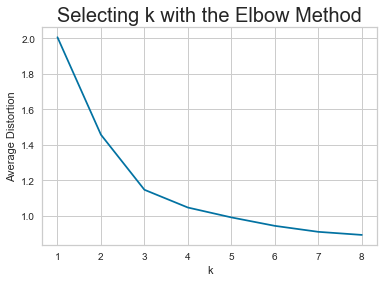

In [33]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(scaled_data)  # Fit kMeans on the data
    prediction = model.predict(scaled_data)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(scaled_data, model.cluster_centers_, "euclidean"), axis=1))
        / scaled_data.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726698397729061
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24857757667769284
For n_clusters = 8, silhouette score is 0.22579348903626834
For n_clusters = 9, silhouette score is 0.22431308024595661


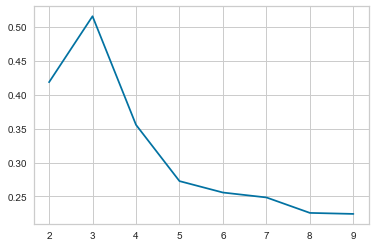

In [34]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((scaled_data))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_data, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

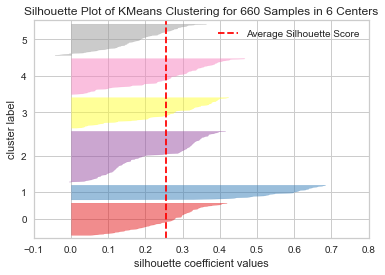

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

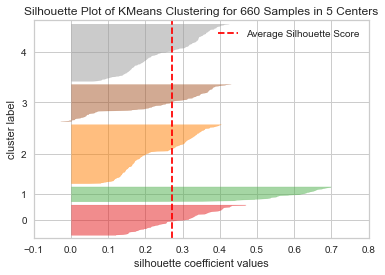

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

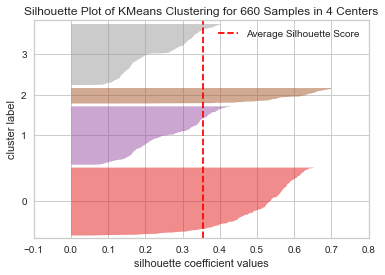

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

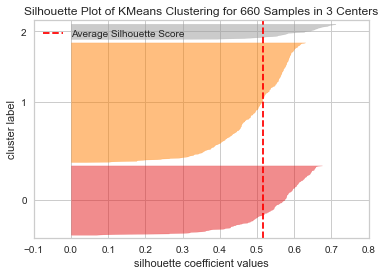

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

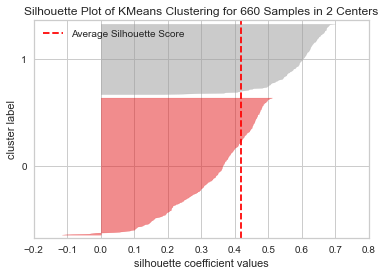

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

Based on the silhouette scores and the elbow method, our ideal k value should be 3

## K=2 K-Means Clustering

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=0)

In [47]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_
att_data["K_means_segments"] = kmeans.labels_

## Hierarchical Clustering

In [50]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


The best linkage method for Eulclidean distance is average

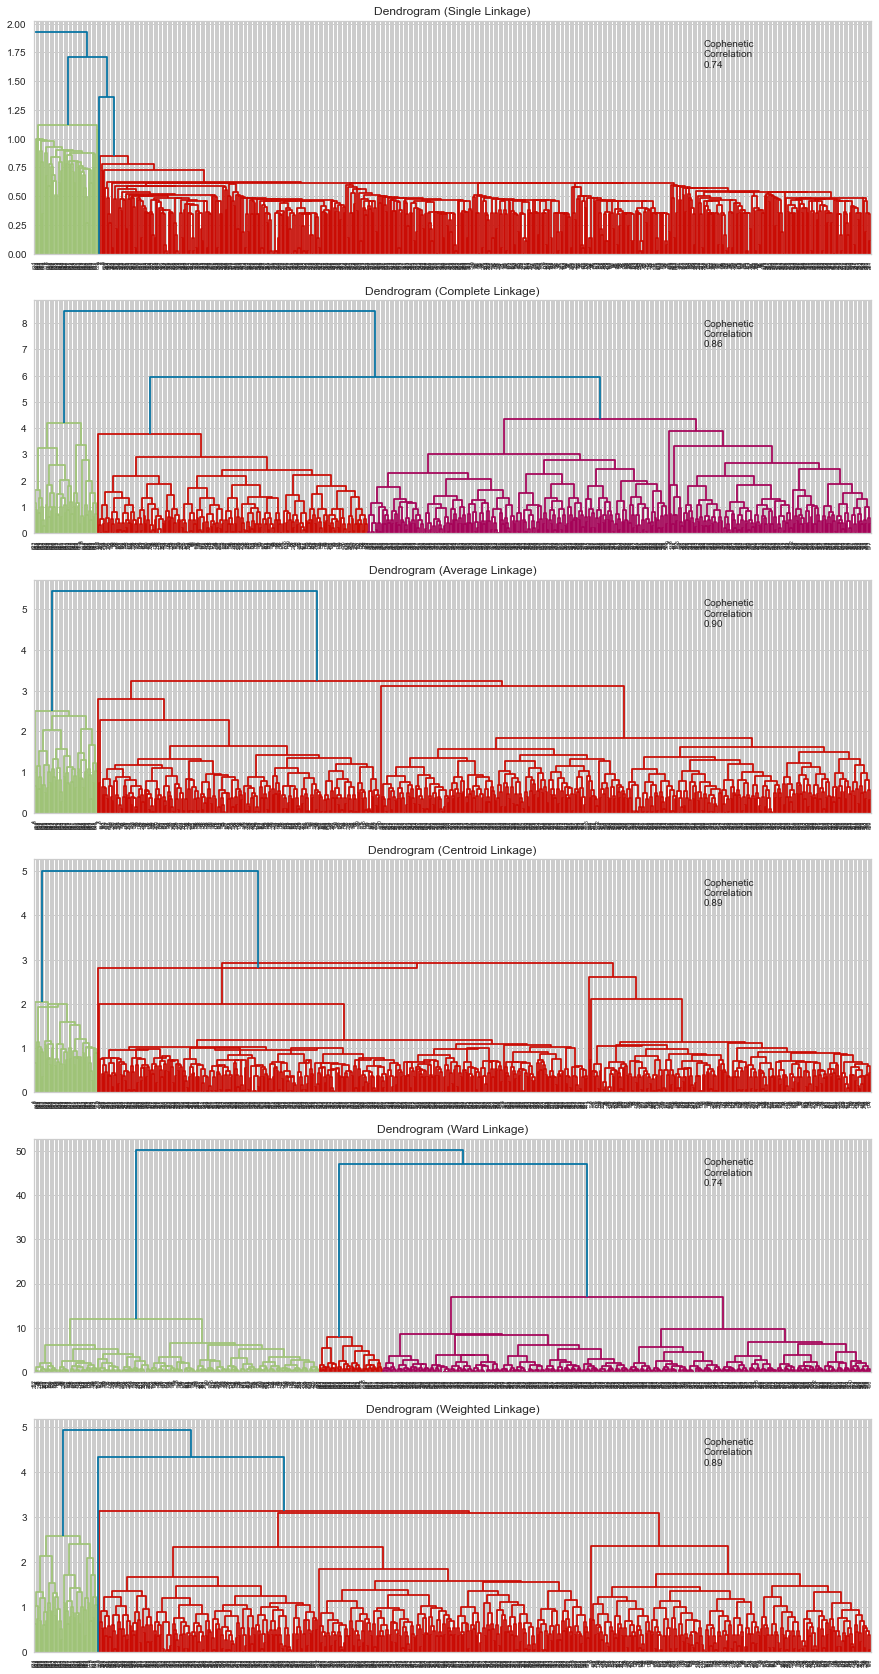

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

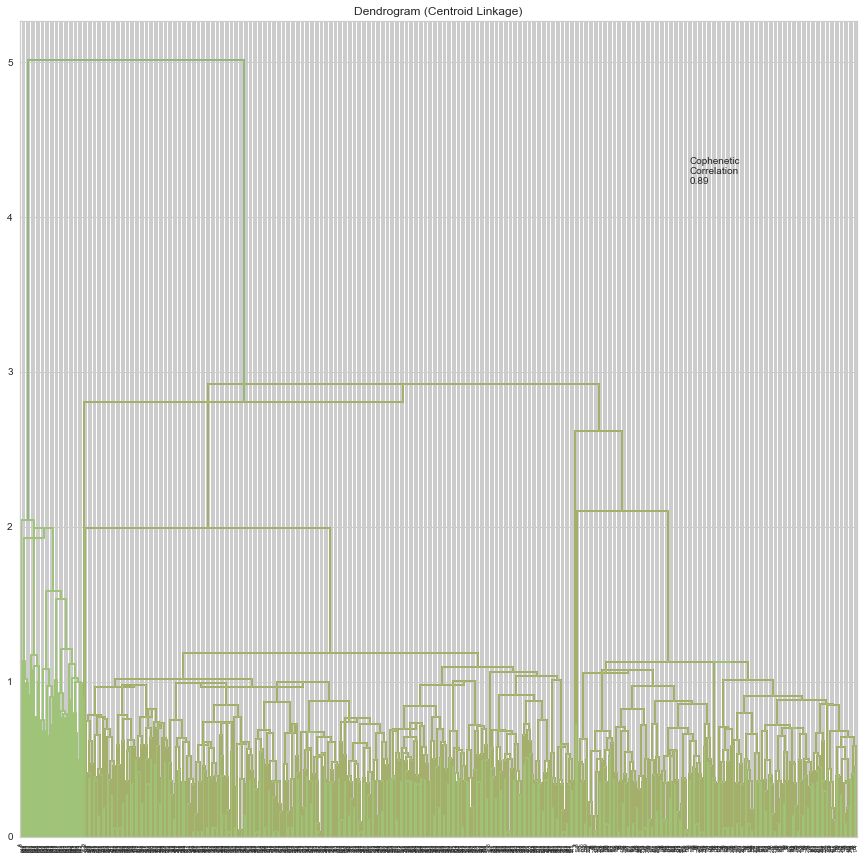

In [55]:
# list of linkage methods
linkage_methods = ["centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_data))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

In [58]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(scaled_data)

scaled_data["HC_Clusters"] = HCmodel.labels_
att_data["HC_Clusters"] = HCmodel.labels_

## Clustering Profile

In [48]:
cluster_profile = data.groupby("K_means_segments").mean()

<AxesSubplot:xlabel='HC_Clusters', ylabel='Total_visits_online'>

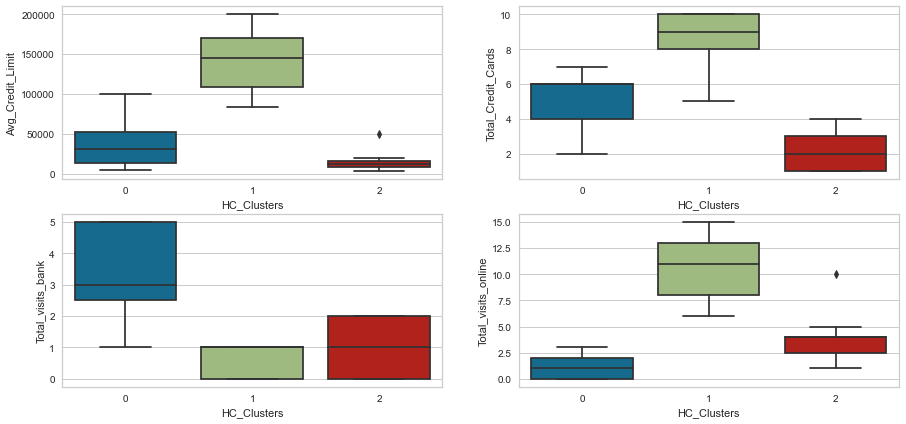

In [62]:
fig, axis = plt.subplots(2,2, figsize = (15,7))


sns.boxplot(data = att_data, x = 'HC_Clusters', y = 'Avg_Credit_Limit', ax = axis[0,0])
sns.boxplot(data = att_data, x = 'HC_Clusters', y = 'Total_Credit_Cards', ax = axis[0,1])
sns.boxplot(data = att_data, x = 'HC_Clusters', y = 'Total_visits_bank', ax = axis[1,0])
sns.boxplot(data = att_data, x = 'HC_Clusters', y = 'Total_visits_online', ax = axis[1,1])



<AxesSubplot:xlabel='K_means_segments', ylabel='Total_visits_online'>

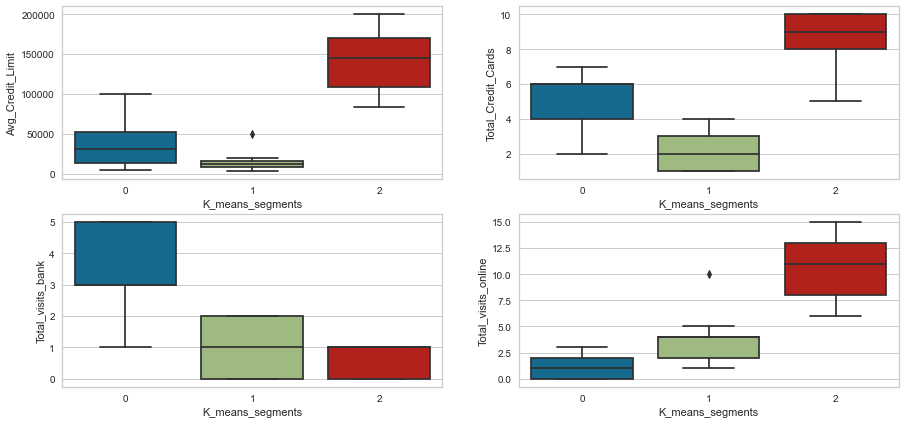

In [61]:
fig, axis = plt.subplots(2,2, figsize = (15,7))


sns.boxplot(data = att_data, x = 'K_means_segments', y = 'Avg_Credit_Limit', ax = axis[0,0])
sns.boxplot(data = att_data, x = 'K_means_segments', y = 'Total_Credit_Cards', ax = axis[0,1])
sns.boxplot(data = att_data, x = 'K_means_segments', y = 'Total_visits_bank', ax = axis[1,0])
sns.boxplot(data = att_data, x = 'K_means_segments', y = 'Total_visits_online', ax = axis[1,1])



## Actionable Insight

Based on the hierachical and k-means clustering methods implemented, the ideal number of clusters is 3. The comparison between the bi-variate analysis grouped by the 2 models yeilded very similar shapes. The index of k-means of 1 and 2 is flipped with the heriachical groups 2 and 1. 

For **K-Means 0th cluster**, or **HC 0th cluster** cluster indicate:

The **0** cluster describes a customer base the perfers to visit the bank in person. This is their most outstanding and distinct feature amongs all the other features. The base tends to have a small credit limit but there is considerable variance amongst this cluster. 

For **K-Means 1th cluster**, or **HC 2th cluster** cluster indicate:

This cluster is distinctly low on their average spending limit. They also have the lowest centralness regarding the number of cards they have.

For **K-Means 2nd cluster**, or **HC 1st cluster** cluster indicate:

This cluster's most defining feature is that they have the highest spending limit. This group also has the highest online banking activity. This should be noted as the bank should try to maneuver they're banking activity online. This should also mean trying to cut back on inperson visits potentially as the customer can do their banking from the comfort of their home, meaning to more time saveda and more trust in the bank to increase they're spending limit